In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, AutoLocator)
import matplotlib.font_manager as fm
sns.set(font_scale=1.2)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = True

In [2]:
READ = "read"
INSERT = "insert"
UPDATE = "update"
SCAN = "scan"
FPTREE = "fptree"
LBTREE = "lbtree"
DPTREE = "dptree"
ROART = "roart"
HOT = "hot"
MASSTREE = "masstree"
BTREE = "btree"
THREADS = "Threads"
PACTREE = "pactree"

data = pd.read_csv("./dram_indexes_skewed_8b_100m_10s.csv")
Threads = data[THREADS]
data = data / 1000000
data[THREADS] = Threads

df_read = data[["btree_read", "masstree_read"]]
# df_insert = data[["btree_insert", "masstree_insert"]]
df_update = data[["btree_update", "masstree_update"]]
df_scan = data[["btree_scan", "masstree_scan"]]

data

,Threads,btree_read,btree_update,btree_scan,masstree_read,masstree_update,masstree_scan
0,1,1.834518,1.755755,0.244016,1.682726,1.627080,0.156088
1,5,9.396721,8.515915,1.239848,8.711650,8.175157,0.776877
2,10,18.587552,17.073216,2.466839,17.479818,16.117540,1.558400
3,20,37.711261,31.077060,4.922427,34.828950,29.943524,3.024383
4,30,49.456268,13.737982,6.153296,45.083841,23.440488,3.638743
5,40,61.016752,11.538215,7.281424,53.945517,19.000721,4.287321
6,60,87.196282,5.961350,10.773430,72.893186,7.741718,4.657377
7,80,106.937464,5.622394,12.140085,86.547015,7.299854,4.918392


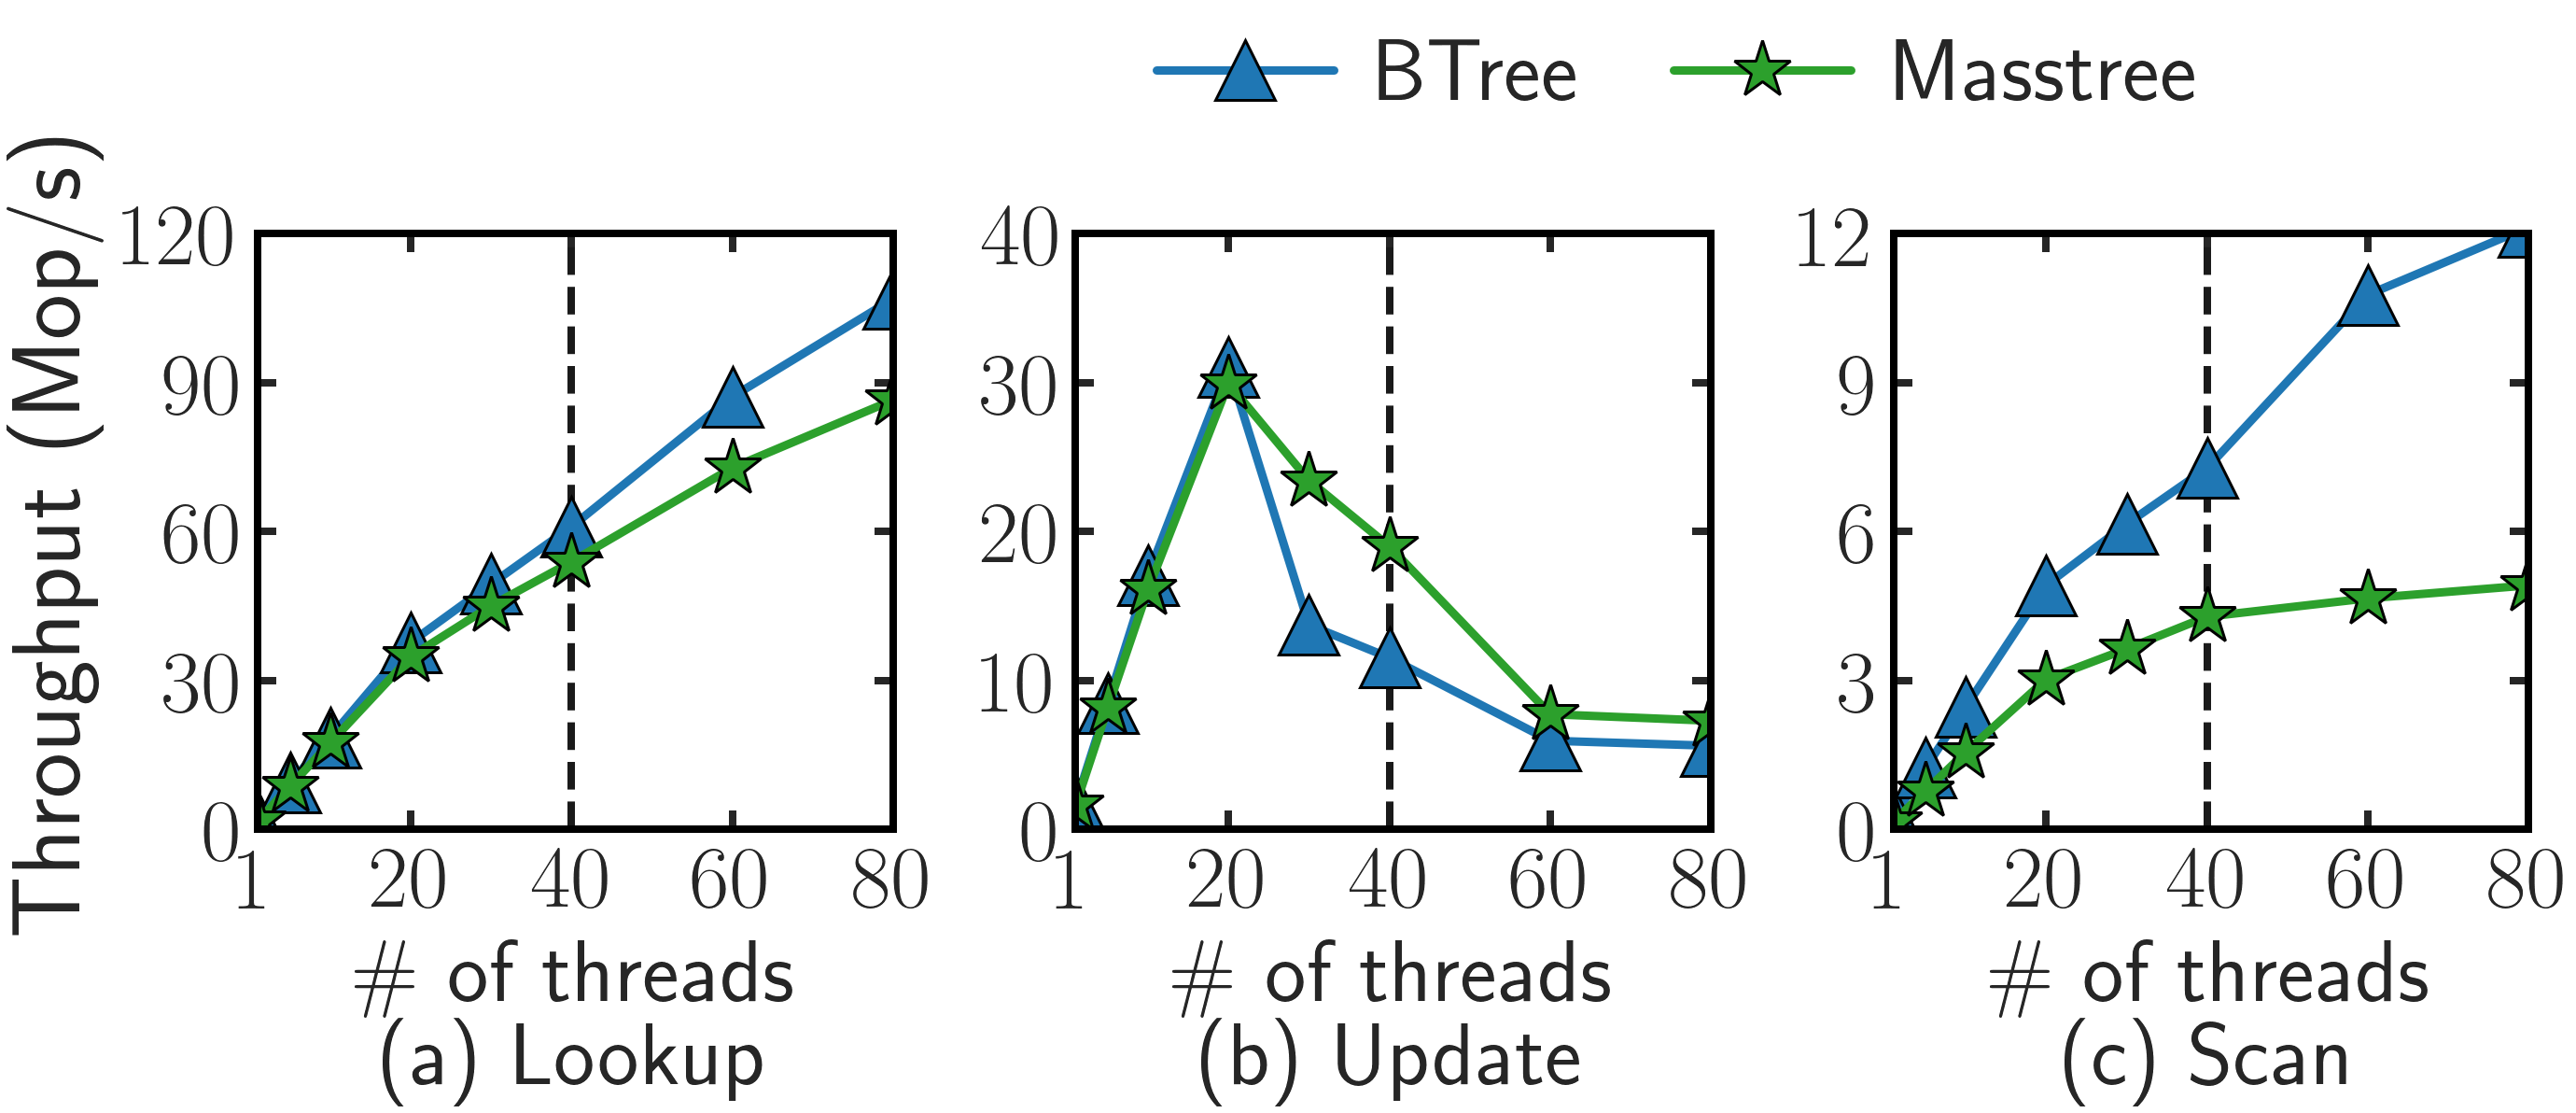

In [3]:
fontsize = 95
myfont = fm.FontProperties(family="Calibri", size=fontsize)

axs = []
fig = plt.figure(figsize=(50,14))
for i in range(141, 144):
    axs.append(fig.add_subplot(i))

for i in range(3):
    axs[i].axvline(x = 40, color='k', linestyle='dashed', linewidth = 8)

operations = [READ, UPDATE, SCAN]
trees = [BTREE, MASSTREE]

# colors=['#60AE47', '#E19153', '#EA96A3', '#4BABA4', '#6DAEE2', '#B6A8EB', '#DF8FE7']
# markers = ['v', '^', 's', 'o', '*', '<', '>']
colors=['#1F77B4', '#2CA02C', '#BCBD22','#E377C2', '#8C564B', '#FF7F0E',  '#7F7F7F', '17BECF']
markers = ['^',"*",'v','<','P','s']

i = 0
j = 0
for operation in operations:
    i += 1
    for tree in trees:
        j = j + 1 if (j % len(trees) == j) else 1  # counter for color & marker
        Y = tree + "_" + operation
        axs[i-1].plot(data[THREADS], data[Y], linewidth=9, \
                    color=colors[j-1], marker=markers[j-1], \
                    markersize=fontsize*2/3, markeredgecolor="black", markeredgewidth=3, \
                    label=data[Y].name)

axs[0].set_xlabel('\# of threads \n(a) Lookup', \
                  fontsize=fontsize, fontname='Calibri', labelpad=20, linespacing=1)
# axs[1].set_xlabel('\# of threads \n(b) Insert', \
#                   fontsize=fontsize, fontname='Calibri', labelpad=20, linespacing=1)
axs[1].set_xlabel('\# of threads \n(b) Update', \
                  fontsize=fontsize, fontname='Calibri', labelpad=20, linespacing=1)
axs[2].set_xlabel('\# of threads \n(c) Scan', \
                  fontsize=fontsize, fontname='Calibri', labelpad=20, linespacing=1)
axs[0].set_ylabel('Throughput (Mop/s)', fontsize=fontsize*1.1, fontname='Calibri', labelpad=20)

for i in range(0, 3):
    axs[i].grid(False)
    axs[i].set_xticks([1, 20, 40, 60, 80])
    xticks = axs[i].xaxis.get_major_ticks()
    axs[i].spines['bottom'].set_color('black')
    axs[i].spines['bottom'].set_linewidth(8)
    axs[i].spines['top'].set_color('black')
    axs[i].spines['top'].set_linewidth(8)
    axs[i].spines['right'].set_color('black')
    axs[i].spines['right'].set_linewidth(8)
    axs[i].spines['left'].set_color('black')
    axs[i].spines['left'].set_linewidth(8)
    axs[i].yaxis.set_ticks_position('both')
    axs[i].xaxis.set_ticks_position('both')
    axs[i].patch.set_facecolor('white')
    axs[i].tick_params(direction="in")
    axs[i].tick_params(axis='both', length=20, width=8, which='major', pad=15)
    axs[i].margins(0)
    for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
        label.set_fontsize(fontsize)
        
axs[0].set_ylim([0, 60])
axs[0].set_yticks([0, 30, 60, 90, 120])
axs[1].set_ylim([0, 24])
axs[1].set_yticks([0, 10, 20, 30, 40])
# axs[2].set_ylim([0, 60])
# axs[2].set_yticks([0, 15, 30, 45, 60])
axs[2].set_ylim([0, 8])
axs[2].set_yticks([0, 3, 6, 9, 12])


lines, labels = axs[0].get_legend_handles_labels()
labels = ["BTree", "Masstree"]
legend = fig.legend(lines, labels, columnspacing=1, handletextpad=0.5, fontsize=fontsize+10, prop=myfont, frameon=False, bbox_to_anchor=(0,1,1,0.2), loc="center", borderaxespad=0, ncol=5)
frame = legend.get_frame()
frame.set_facecolor('none')
frame.set_edgecolor('none')

plt.tight_layout(w_pad=5, h_pad=10)

plt.savefig("./dram_skewed.pdf", bbox_inches='tight', pad_inches=0) 
plt.show()